In [1]:
# !pip install matplotlib statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
landtemps = pd.read_csv("data/landtemps2023avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index('iso_code', inplace=True)

In [8]:
landtemps[['station', 'country', 'latabs', 'elevation', 'avgtemp']].sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
11924,WOLF_POINT_29_ENE,United States,48.3083,635.5,5.896364
10671,LITTLE_GRASSY,United States,37.4833,1859.3,10.185000
10278,FLOWERY_TRAIL_WASHINGTON,United States,48.2975,792.5,8.180000
8436,ROCKSPRINGS,United States,30.0239,726.0,20.310833
1715,PETERBOROUGH,Canada,44.2333,191.0,7.703333
5650,TRACY_PUMPING_PLT,United States,37.7967,18.6,17.642500
335,NEPTUNE_ISLAND,Australia,35.3365,32.0,16.475000
372,EUDUNDA,Australia,34.1754,415.0,15.557500
2987,KOZHIKODE,India,11.2500,5.0,29.566667
7588,TRYON,United States,35.2058,365.8,16.125000


In [5]:
landtemps.shape

(12137, 7)

In [9]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12137.000000,12137.000000,12137.000000
mean,40.498445,597.781173,11.736655
std,12.692193,775.289841,8.433585
min,0.017000,-350.000000,-57.409167
25%,34.568600,77.700000,6.400000
50%,40.705300,271.300000,11.108182
75%,46.816700,823.900000,17.037500
max,90.000000,9999.000000,33.950000


In [10]:
landtemps.avgtemp.skew()

-0.3856060165979757

In [11]:
landtemps.avgtemp.kurtosis()

2.7939884544586033

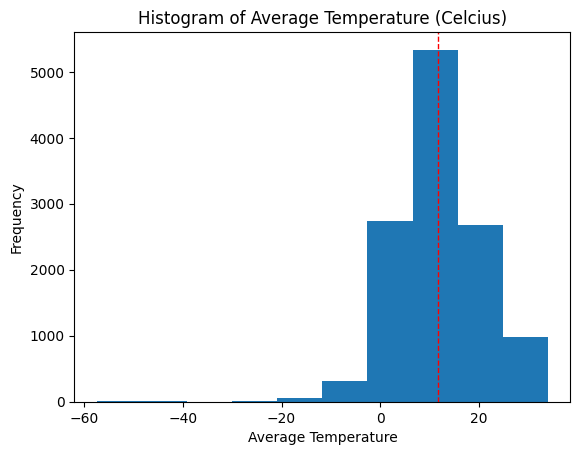

In [12]:
plt.hist(landtemps.avgtemp)
plt.axvline(x=landtemps.avgtemp.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Average Temperature (Celcius)')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

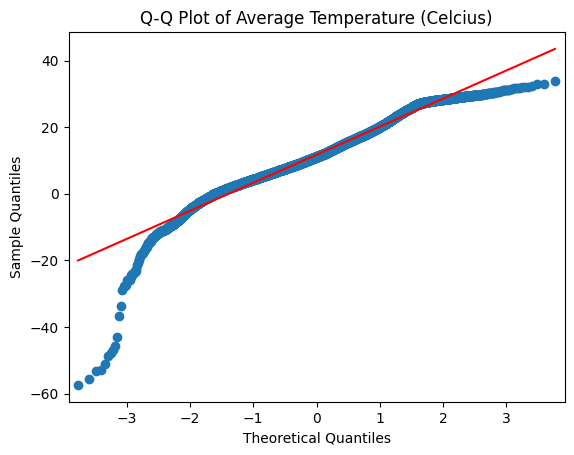

In [13]:
sm.qqplot(landtemps.avgtemp.sort_values(), line='s')
plt.title('Q-Q Plot of Average Temperature (Celcius)')
plt.show()

In [14]:
covidtotals.total_cases_pm.skew()

0.8349032460009967

In [15]:
covidtotals.total_cases_pm.kurtosis()

-0.4280595203351645

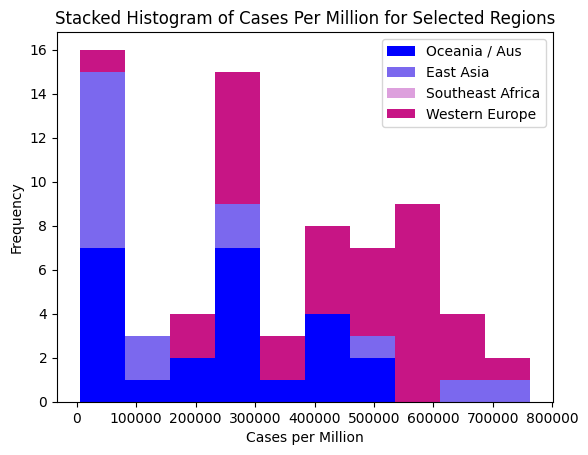

In [16]:
showregions = ['Oceania / Aus', 'East Asia', 'Southeast Africa', 'Western Europe']

def getcases(regiondesc):
    return covidtotals.loc[covidtotals.region==regiondesc, 'total_cases_pm']

plt.hist([getcases(region) for region in showregions], color=['blue', 'mediumslateblue', 'plum', 'mediumvioletred'], label=showregions, stacked=True)

plt.title('Stacked Histogram of Cases Per Million for Selected Regions')
plt.xlabel('Cases per Million')
plt.ylabel('Frequency')
plt.legend()
plt.show()


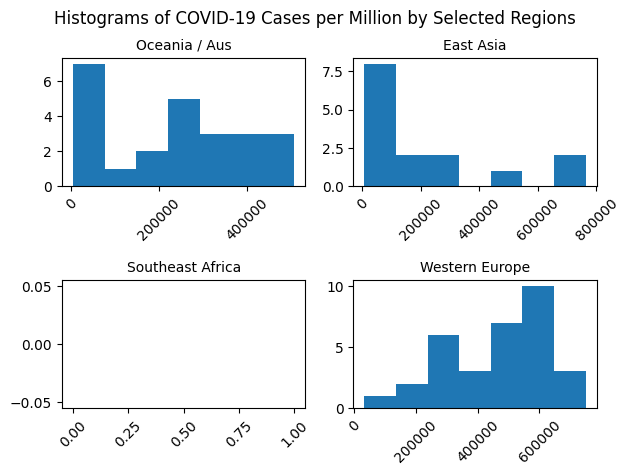

In [17]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of COVID-19 Cases per Million by Selected Regions')
axes = axes.ravel()

for j, ax in enumerate(axes):
    ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].total_cases_pm, bins=7)
    ax.set_title(showregions[j], fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
